# 1.准备工作

## 1.1 import libraries

In [1]:
 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
 





In [2]:
# 预设字体格式，并传给rc方法
font = {'family': 'SimSun', "size": 16}

# 设置 字体
matplotlib.rc('font', **font) 

In [3]:
# 设定文件存储目录
datafolder='D:/tdata/'

In [4]:
# 导入数据
# 从网盘链接（直链）导入数据
#df = pd.read_csv('https://od.lk/d/179075968_VxeGV/movie150clean.csv', index_col=0)

# 从本地磁盘导入数据
df = pd.read_csv(datafolder+'movie150clean.csv', index_col=0)
df.tail(5) 

movie_weblink  \
n                                                 
146   https://movie.douban.com/subject/1307315/   
147  https://movie.douban.com/subject/26628357/   
148   https://movie.douban.com/subject/6307447/   
149   https://movie.douban.com/subject/1295399/   
150   https://movie.douban.com/subject/1395091/   

                                         photo_weblink       cn_name  \
n                                                                      
146  https://img9.doubanio.com/view/photo/s_ratio_p...          哪吒闹海   
147  https://img9.doubanio.com/view/photo/s_ratio_p...  一个叫欧维的男人决定去死   
148  https://img9.doubanio.com/view/photo/s_ratio_p...        被解救的姜戈   
149  https://img9.doubanio.com/view/photo/s_ratio_p...           七武士   
150  https://img9.doubanio.com/view/photo/s_ratio_p...         未麻的部屋   

                  fr_name  rating  numbers         movie_sentence  \
n                                                                   
146                           9.1   208858               想你时你在闹海。   
147  En man som heter Ove     8.9   346098               惠及一生的美丽。   
148      Django Unchained     8.8   499185  热血沸腾，那个低俗、性感的无耻混蛋又来了。   
149                  七人の侍     9.3   158687                  时代悲歌。   
150          Perfect Blue     9.0   242480  好的剧本是，就算你猜到了结局也猜不到全部。   

                                  directors  \
n                                             
146  严定宪 Dingxian Yan / 王树忱 Shuchen Wang      
147                  汉内斯·赫尔姆 Hannes Holm      
148            昆汀·塔伦蒂诺 Quentin Tarantino      
149                   黑泽明 Akira Kurosawa      
150                       今敏 Satoshi Kon      

                                actors  ryear country        theme  
n                                                                   
146                       梁正晖 Zhenghui  1979     中国大陆     冒险 动画 奇幻  
147              罗夫·拉斯加德 Rolf Lassgård  2015       瑞典           剧情  
148                  杰米·福克斯 Jamie Foxx  2012       美国  剧情 动作 西部 冒险  
149                三船敏郎 Toshirô Mifune  1954       日本     动作 冒险 剧情  
150  岩男润子 Junko Iwao / 松本梨香 Rica Matsu  1997       日本     动画 奇幻 惊悚

# 2.频数分析

## 2.1频数分析：电影上映年份

In [5]:
#df数据框的ryear变量，数据类型改为【整数】（int）
df['ryear'] = df['ryear'].astype(int)
df['ryear'].dtype

dtype('int32')

df['ryear'] 电影上映年份的频数分析——条形图

<Axes: >

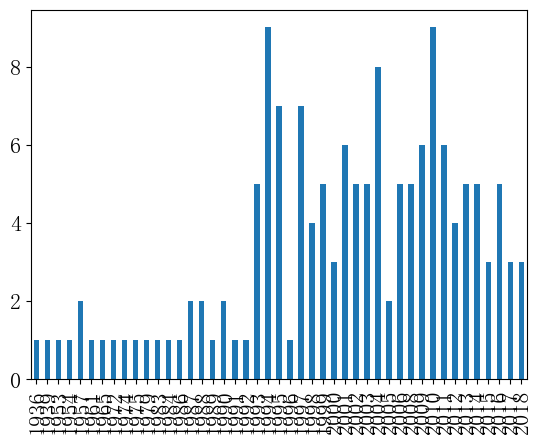

In [6]:
df["ryear"].value_counts().sort_index().plot(kind="bar")

df['ryear'] 电影上映年份的频数分析——条形图
修改图的大小（15，7）——宽15英寸，高7英寸
柱形图的颜色设定为【green】——绿色
颜色的列表参考https://html-color.codes/
    

<Axes: >

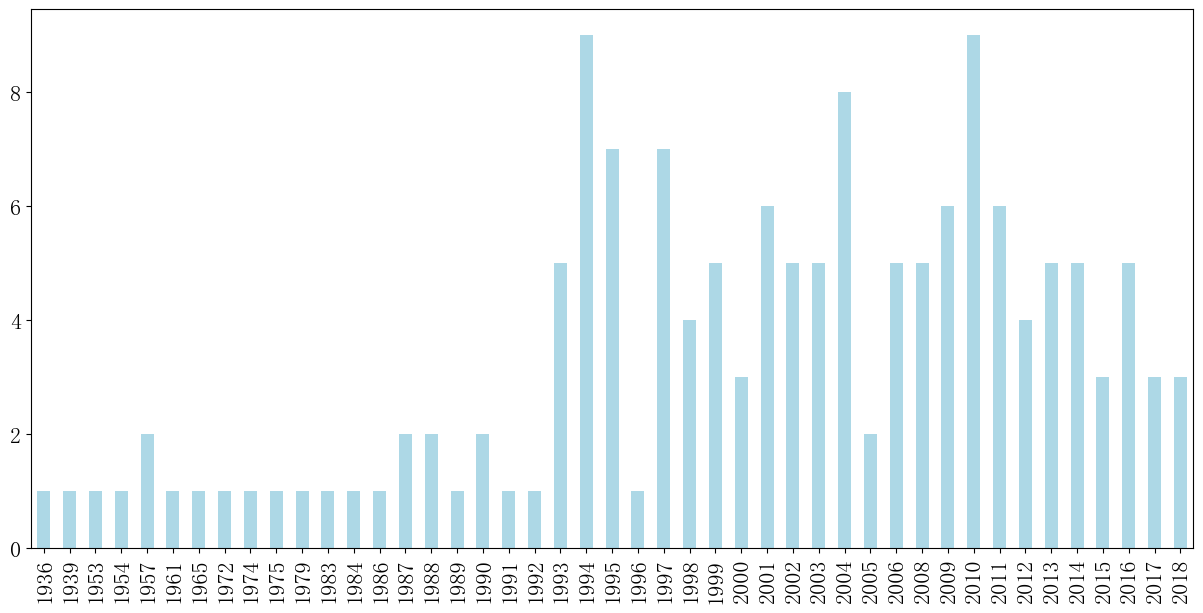

In [9]:
df["ryear"].value_counts().sort_index().plot(kind="bar",figsize=(15,7),color="lightblue")

df['ryear'] 电影上映年份的频数分析——条形图
给柱形图添加频数数值

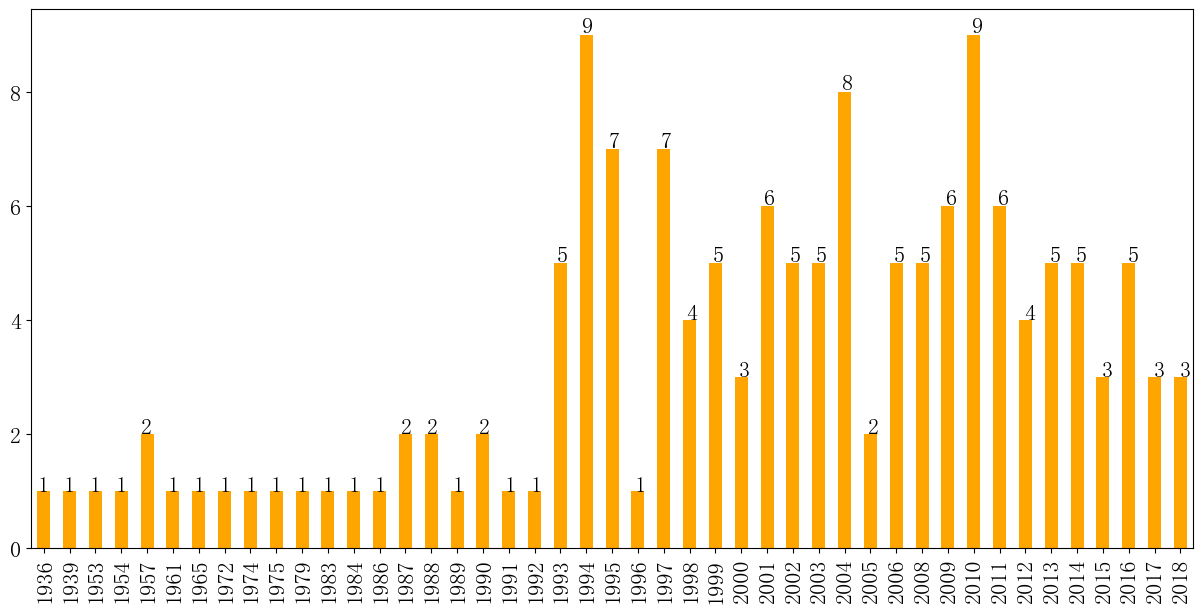

In [100]:
plot=df["ryear"].value_counts().sort_index().plot(kind="bar",figsize=(15,7),color="orange")
for p in plot.patches:
    plot.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
 

In [101]:
df_year=df["ryear"].value_counts().to_frame()
df_year.reset_index(inplace=True)
df_year = df_year.rename(columns = {'index':'year','ryear':'freq'})
df_year['year'] = df_year['year'].astype(int)
print(df_year.columns)
df_year.sort_values(by='year')

Index(['year', 'freq'], dtype='object')


year  freq
33  1936     1
28  1939     1
41  1953     1
44  1954     1
24  1957     2
40  1961     1
36  1965     1
35  1972     1
39  1974     1
37  1975     1
30  1979     1
31  1983     1
29  1984     1
43  1986     1
23  1987     2
27  1988     2
38  1989     1
26  1990     2
34  1991     1
42  1992     1
13  1993     5
0   1994     9
3   1995     7
32  1996     1
4   1997     7
17  1998     4
9   1999     5
20  2000     3
5   2001     6
11  2002     5
16  2003     5
2   2004     8
25  2005     2
10  2006     5
14  2008     5
6   2009     6
1   2010     9
7   2011     6
18  2012     4
8   2013     5
15  2014     5
19  2015     3
12  2016     5
22  2017     3
21  2018     3

df['ryear'] 电影上映年份的频数分析——条形图
修改图的大小（15，7）——宽15英寸，高7英寸
柱形图的颜色设定为【orange】——橙色
颜色的列表参考https://html-color.codes/
    
保存图片到本地

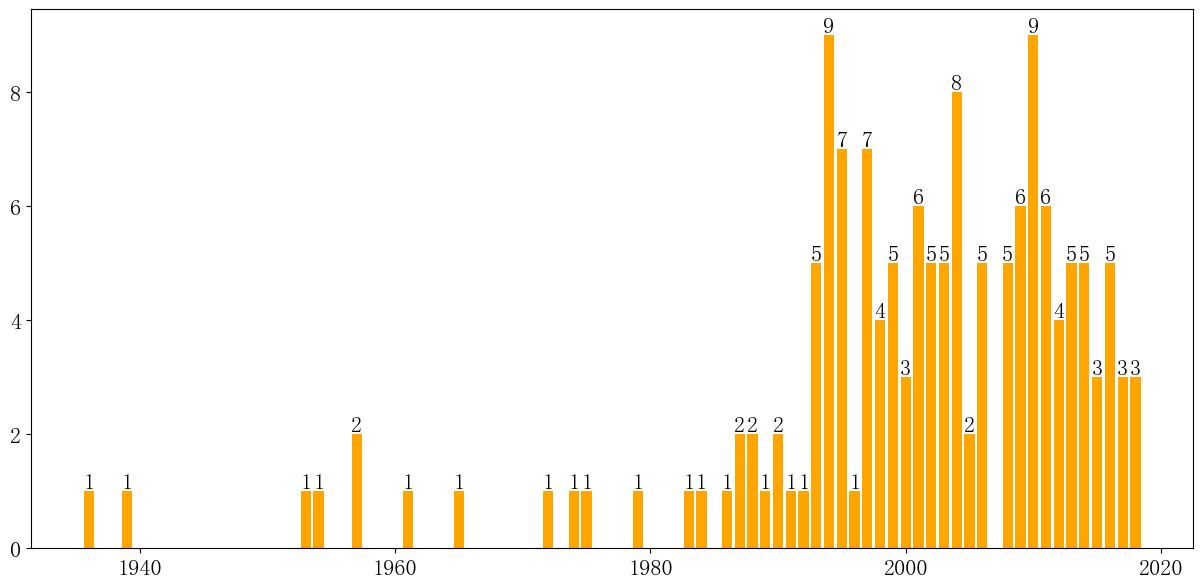

In [102]:
xs =df_year["year"]
ys =df_year["freq"]
plt.figure(figsize=(15,7))
plt.bar(xs, ys, color='orange')
# html color codes   https://html-color.codes/
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig(datafolder+"movie_yearly.jpg",dpi=600)    #保存图片到本地
plt.show()


## 2.2频数分析：电影产地（国家或地区）

In [103]:
# 字符变量，拆分为具体国家地区，一个多选题，
df_country=df['country'].str.split(' ',expand=True)
df_country.head(5)


0     1     2     3     4     5
n                                    
1    美国  None  None  None  None  None
2  中国大陆  中国香港  None  None  None  None
3    美国  None  None  None  None  None
4    法国    美国  None  None  None  None
5    美国   墨西哥  澳大利亚   加拿大  None  None

对多选题做频数统计

In [104]:

df_country1=df_country.stack().value_counts().to_frame()
df_country1.reset_index(inplace=True)
df_country1 = df_country1.rename(columns = {'index':'country',0:'freq'})
print(df_country1.columns)
df_country1.sort_values(by='freq',ascending=False)



Index(['country', 'freq'], dtype='object')


country  freq
0       美国    84
1       日本    22
2       英国    19
3     中国香港    15
4     中国大陆    14
5       法国    12
6       德国     9
7       韩国     9
8      意大利     8
9      加拿大     6
12     新西兰     3
13    中国台湾     3
11    澳大利亚     3
10      瑞士     3
14      印度     2
15      瑞典     2
16      伊朗     1
17      荷兰     1
18      巴西     1
19      丹麦     1
20     卡塔尔     1
21     西班牙     1
22      波兰     1
23    塞浦路斯     1
24     黎巴嫩     1
25     墨西哥     1
26     奥地利     1

In [106]:
# 频数表输出为一个csv文件
df_country1.to_csv(datafolder+'movie_country.csv')

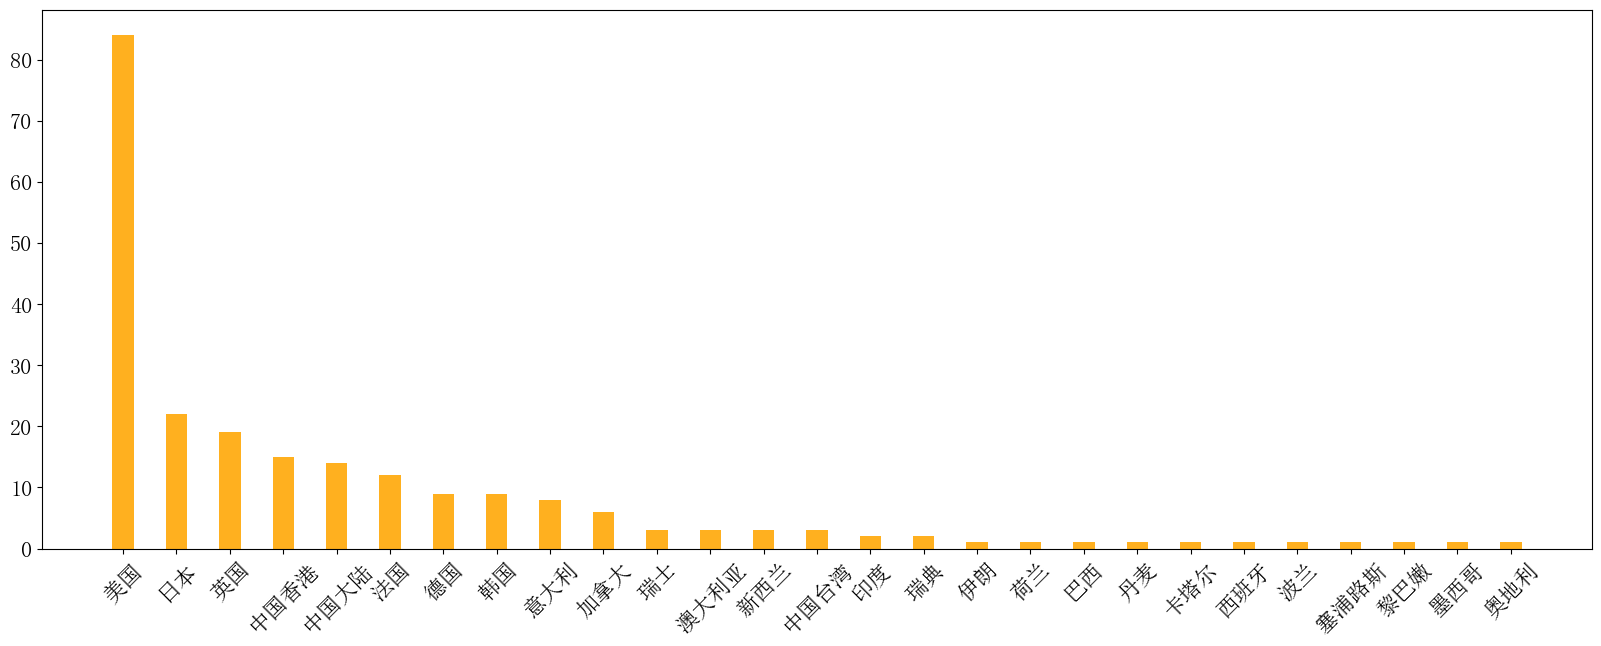

In [107]:
xs =df_country1["country"]
ys = df_country1["freq"]
width1 =0.4
plt.figure(figsize=(20,7))
plt.bar(xs, ys, width=width1,color='#ffb01f')
# html color codes   https://html-color.codes/
plt.xticks(rotation=45)

plt.show()

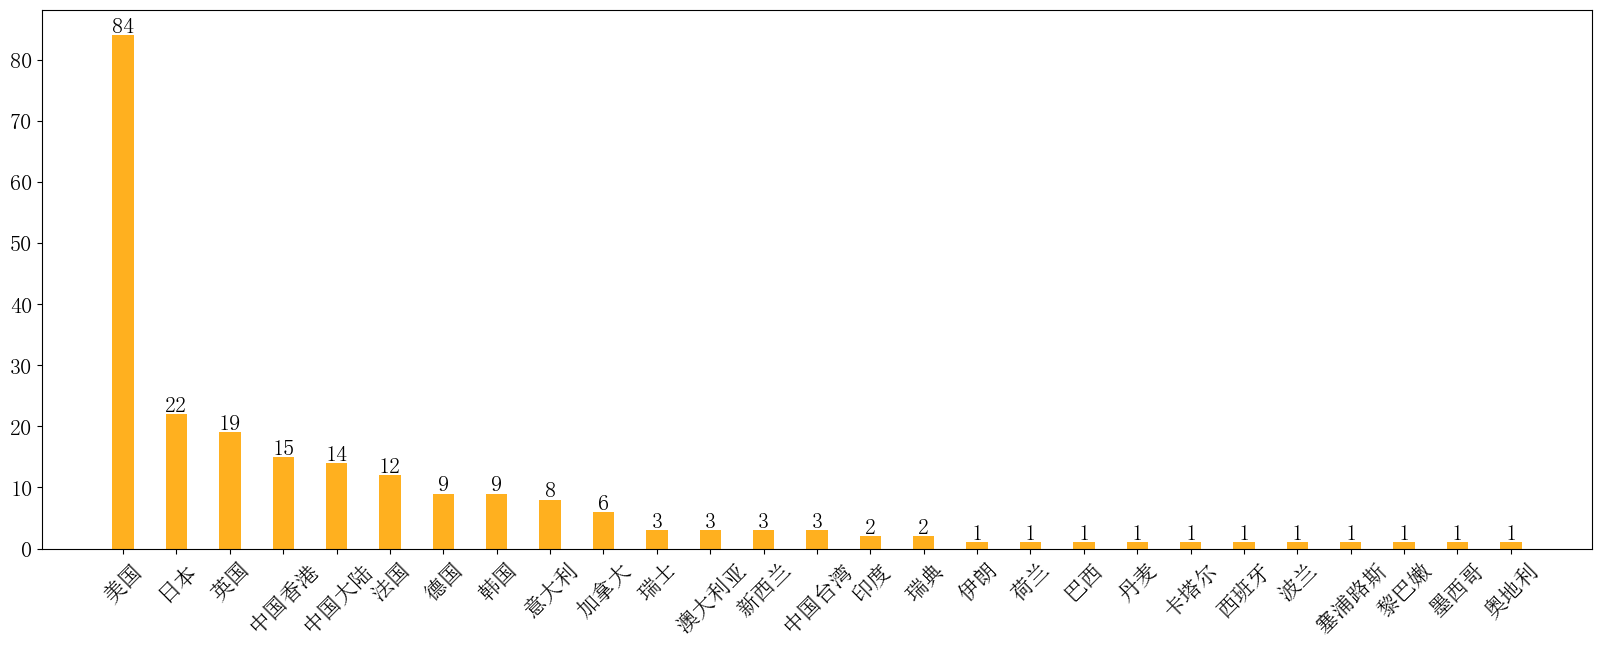

In [110]:

xs =df_country1["country"]
ys = df_country1["freq"]
width1 =0.4
plt.figure(figsize=(20,7))
plt.bar(xs, ys, width=width1,color='#ffb01f')
# html color codes   https://html-color.codes/
plt.xticks(rotation=45)
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig(datafolder+"movie_region1.png",dpi=600,format="png")




plt.show()

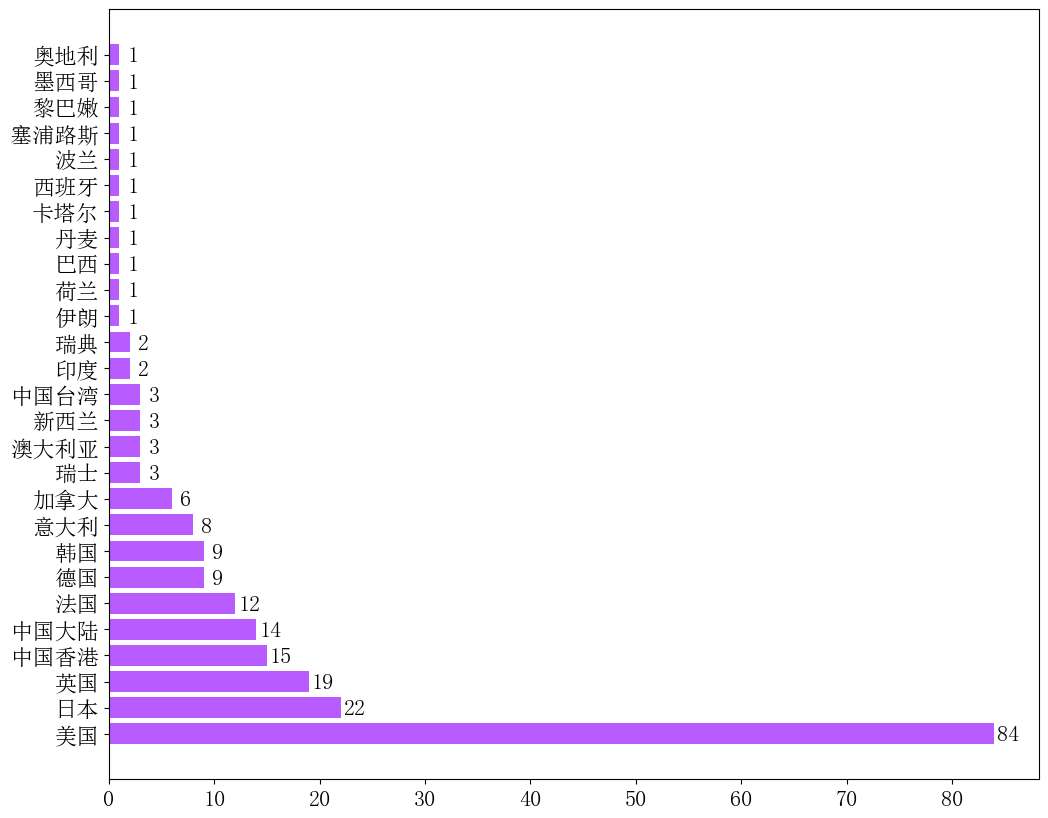

In [109]:
plt.figure(figsize=(12,10))
plt.barh(xs,ys,color='#b85cff')
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(10,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig(datafolder+"movie_region2.jpg",dpi=600)    #保存图片到本地    
plt.show()

## 2.3 频数分析：电影主题

In [111]:
df_theme=df['theme'].str.split(' ',expand=True)
df_theme.head(5)

0   1     2     3     4
n                          
1  犯罪  剧情  None  None  None
2  剧情  爱情    同性  None  None
3  剧情  爱情  None  None  None
4  剧情  动作    犯罪  None  None
5  剧情  爱情    灾难  None  None

In [112]:
df_theme1=df_theme.stack().value_counts().to_frame()
df_theme1['theme']=df_theme1.index
df_theme1 = df_theme1.rename(columns = {1:'theme',0:'freq'})
print(df_theme1.columns)
df_theme1


Index(['freq', 'theme'], dtype='object')


freq theme
剧情    114    剧情
喜剧     34    喜剧
爱情     34    爱情
奇幻     33    奇幻
冒险     32    冒险
动画     24    动画
犯罪     21    犯罪
动作     18    动作
惊悚     17    惊悚
悬疑     16    悬疑
科幻     11    科幻
传记     10    传记
家庭     10    家庭
战争      9    战争
历史      6    历史
音乐      5    音乐
古装      5    古装
歌舞      4    歌舞
同性      4    同性
灾难      2    灾难
西部      2    西部
儿童      2    儿童
纪录片     2   纪录片
武侠      2    武侠
运动      1    运动
情色      1    情色

In [113]:
type(df_theme1)

pandas.core.frame.DataFrame

In [66]:
# 保存频数表
df_theme1.to_csv('D:/tdata/df_theme1.csv')

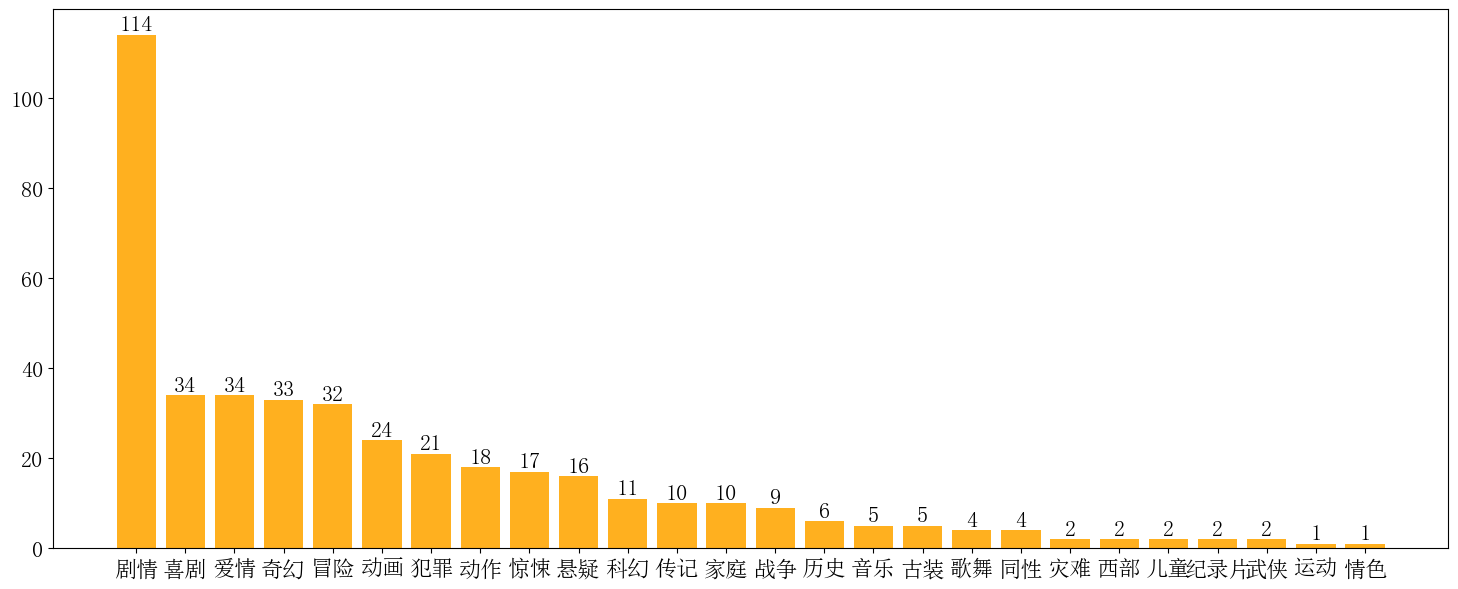

In [115]:
xs =df_theme1["theme"]
ys = df_theme1["freq"]
plt.figure(figsize=(18,7))
plt.bar(xs, ys, color='#ffb01f')
# html color codes   https://html-color.codes/
#plt.xticks(rotation=45)
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig(datafolder+"movie_theme1.jpg",dpi=600,format="jpg")    #保存图片到本地
plt.show()

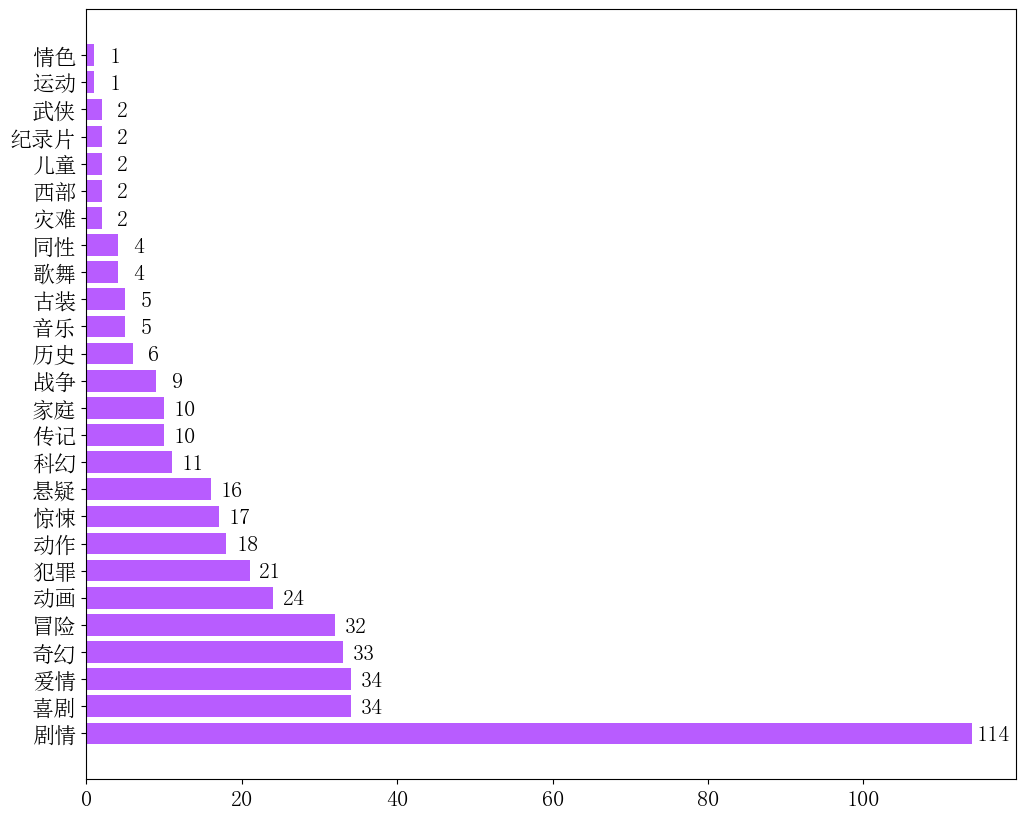

In [116]:
plt.figure(figsize=(12,10))
plt.barh(xs, ys,color='#b85cff')
for x,y in zip(xs,ys):
    label = "{:.0f}".format(y)
    plt.annotate(label, # this is the text
                 (y,x), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(15,-5), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig(datafolder+"movie_theme2.jpg",dpi=600)    #保存图片到本地   
plt.show()

# 3.电影评分的均值

## 3.1 电影评分均值：上映年份

In [117]:
agg_year=df.groupby("ryear")[['rating']].agg('mean')
agg_year['year']=agg_year.index
print(agg_year.columns)
agg_year.head(5)

Index(['rating', 'year'], dtype='object')


rating  year
ryear              
1936      9.3  1936
1939      9.3  1939
1953      9.0  1953
1954      9.3  1954
1957      9.5  1957

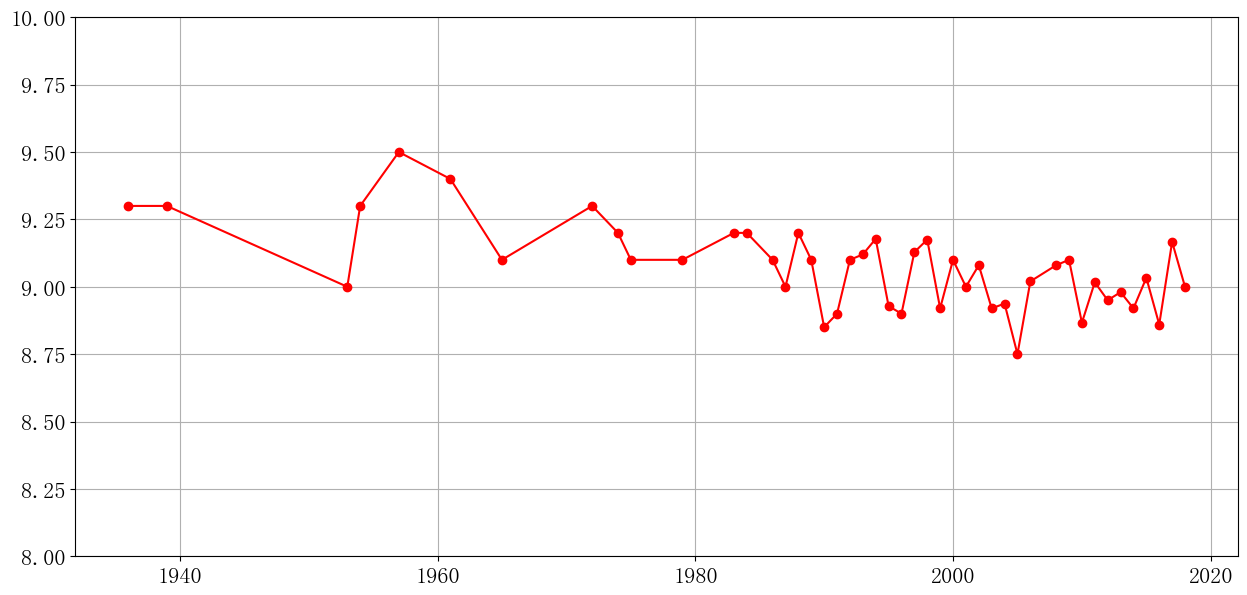

In [118]:
plt.figure(figsize=(15,7))
xs=agg_year['year']
ys=agg_year['rating']
plt.plot(xs, ys,color='red', marker='o')
plt.grid(True)
plt.ylim(8, 10)   
plt.show()

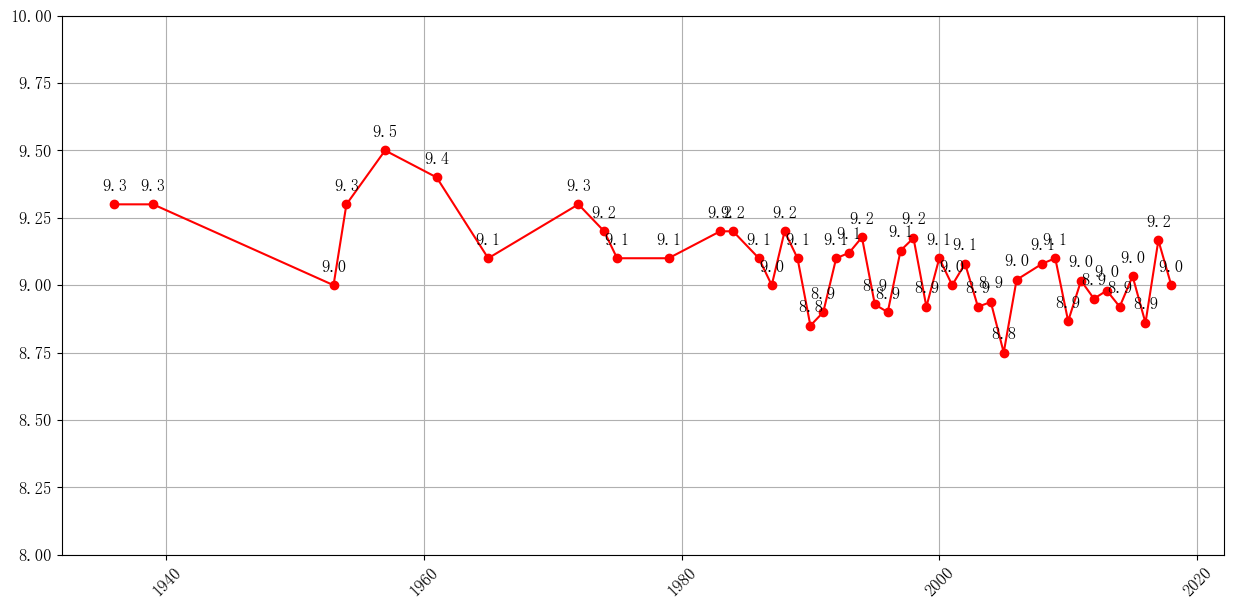

In [120]:
#set font of all elements to size 12
plt.rc('font', size=12) 
plt.figure(figsize=(15,7))
xs=agg_year['year']
ys=agg_year['rating']
plt.plot(xs, ys,color='red', marker='o')
plt.grid(True)
plt.ylim(8, 10)
plt.xticks(rotation=45)
for x,y in zip(xs,ys):

    label = "{:.1f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,10), # distance from text to points (x,y)
                 ha='center',# horizontal alignment can be left, right or cent
                fontsize=12) 
plt.savefig(datafolder+"movie_rating_yearly.jpg",dpi=600)    #保存图片到本地                   
plt.show()

## 3.2 电影评分均值：电影产地（国家或地区）

In [122]:
df_country1

country  freq
0       美国    84
1       日本    22
2       英国    19
3     中国香港    15
4     中国大陆    14
5       法国    12
6       德国     9
7       韩国     9
8      意大利     8
9      加拿大     6
10      瑞士     3
11    澳大利亚     3
12     新西兰     3
13    中国台湾     3
14      印度     2
15      瑞典     2
16      伊朗     1
17      荷兰     1
18      巴西     1
19      丹麦     1
20     卡塔尔     1
21     西班牙     1
22      波兰     1
23    塞浦路斯     1
24     黎巴嫩     1
25     墨西哥     1
26     奥地利     1

In [123]:
df_country1['rating']=0.0
for i in range(0,27):
    temp=0.0
    for j in range(1,151):
        if df_country1.country[i] in df1.country[j]:
            temp=temp + df1.rating[j]
            #print(temp)
    df_country1.rating[i] = round(temp / df_country1.freq[i],3)

C:\Users\kaiwu\AppData\Local\Temp\ipykernel_8656\2036557035.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_country1.rating[i] = round(temp / df_country1.freq[i],3)


In [82]:
df_country1

country  freq  rating
0       美国    84   9.029
1       日本    22   9.018
2       英国    19   9.037
3     中国香港    15   8.953
4     中国大陆    14   9.121
5       法国    12   9.050
6       德国     9   9.011
7       韩国     9   8.956
8      意大利     8   9.175
9      加拿大     6   9.083
10      瑞士     3   9.100
11    澳大利亚     3   9.000
12     新西兰     3   9.167
13    中国台湾     3   9.100
14      印度     2   9.100
15      瑞典     2   9.000
16      伊朗     1   9.200
17      荷兰     1   8.900
18      巴西     1   8.900
19      丹麦     1   9.100
20     卡塔尔     1   9.100
21     西班牙     1   8.800
22      波兰     1   9.200
23    塞浦路斯     1   9.100
24     黎巴嫩     1   9.100
25     墨西哥     1   9.400
26     奥地利     1   8.800

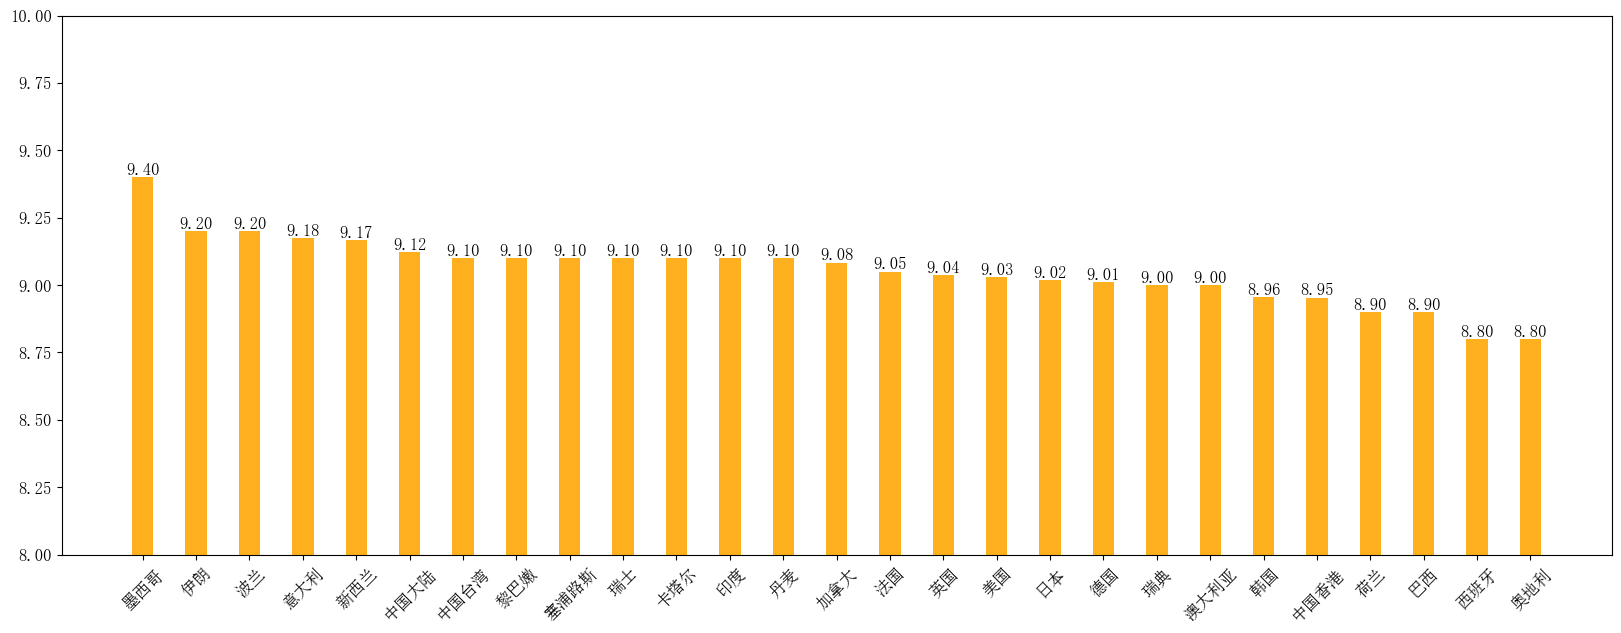

In [124]:
df_country2 = df_country1.sort_values('rating', ascending=False)
xs =df_country2["country"]
ys = df_country2["rating"]
width1 =0.4
plt.figure(figsize=(20,7))
plt.bar(xs, ys, width=width1,color='#ffb01f')
# html color codes   https://html-color.codes/
plt.xticks(rotation=45)
plt.ylim(8, 10)

for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,2), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig(datafolder+"movie_rating_region1.jpg",dpi=600)    #保存图片到本地   
plt.show()

## 3.3 电影评分均值：电影主题

In [125]:
df_theme1.shape

(26, 2)

In [126]:
df_theme1['rating']=0.0
for i in range(0,26):
    temp=0.0
    for j in range(1,151):
        if df_theme1.theme[i] in df.theme[j]:
            temp=temp + df.rating[j]
            #print(temp)
    df_theme1.rating[i] = round(temp / df_theme1.freq[i],3)

C:\Users\kaiwu\AppData\Local\Temp\ipykernel_8656\474625504.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_theme1.rating[i] = round(temp / df_theme1.freq[i],3)


In [127]:
df_theme1

freq theme  rating
剧情    114    剧情   9.058
喜剧     34    喜剧   8.965
爱情     34    爱情   8.997
奇幻     33    奇幻   8.967
冒险     32    冒险   8.991
动画     24    动画   9.008
犯罪     21    犯罪   9.067
动作     18    动作   8.967
惊悚     17    惊悚   8.894
悬疑     16    悬疑   8.931
科幻     11    科幻   9.055
传记     10    传记   9.030
家庭     10    家庭   9.050
战争      9    战争   9.133
历史      6    历史   9.167
音乐      5    音乐   9.160
古装      5    古装   8.860
歌舞      4    歌舞   9.075
同性      4    同性   9.050
灾难      2    灾难   9.000
西部      2    西部   8.850
儿童      2    儿童   8.950
纪录片     2   纪录片   9.400
武侠      2    武侠   8.700
运动      1    运动   9.000
情色      1    情色   8.900

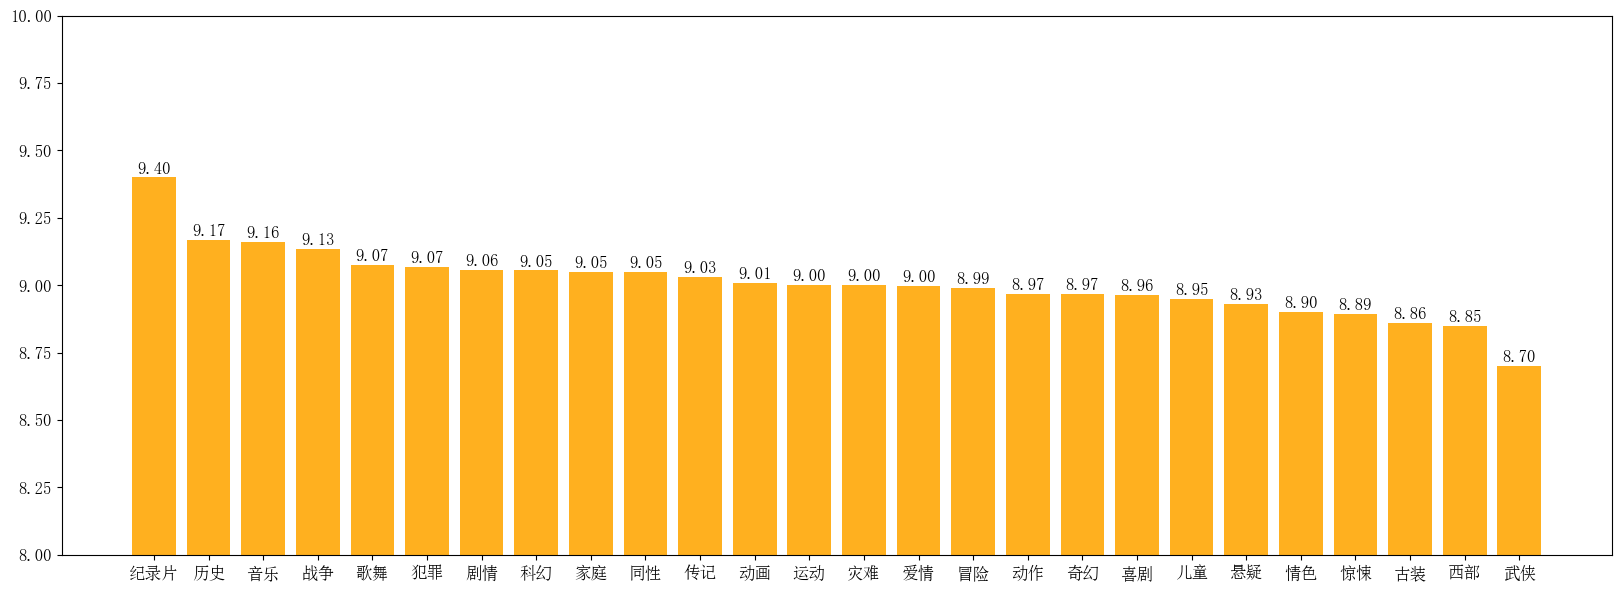

In [128]:
df_theme2 = df_theme1.sort_values('rating', ascending=False)
xs =df_theme2["theme"]
ys = df_theme2["rating"]
plt.figure(figsize=(20,7))
plt.bar(xs, ys, color='#ffb01f')
plt.ylim(8, 10)
# html color codes   https://html-color.codes/
#plt.xticks(rotation=45)
for x,y in zip(xs,ys):
    label = "{:.2f}".format(y)
    plt.annotate(label, # this is the text
                 (x,y), # these are the coordinates to position the label
                 textcoords="offset points", # how to position the text
                 xytext=(0,3), # distance from text to points (x,y)
                 ha='center') # horizontal alignment can be left, right or center
plt.savefig(datafolder+"movie_rating_theme.jpg",dpi=600)    #保存图片到本地   
plt.show()